In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [36]:
from sklearn.datasets import load_iris

In [37]:
iris = load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [38]:
iris.target,iris.feature_names

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [39]:
df = pd.DataFrame(data=iris.data,columns = iris.feature_names)

In [40]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [42]:
df['class_type'] = iris.target

In [43]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class_type           0
dtype: int64

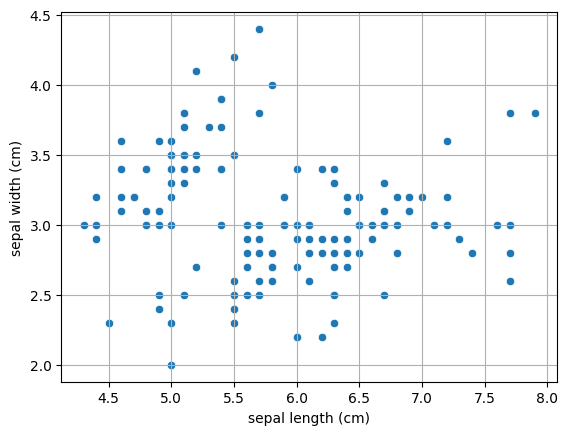

In [44]:
sns.scatterplot(data=df,x="sepal length (cm)",y="sepal width (cm)")
plt.grid()
plt.show()

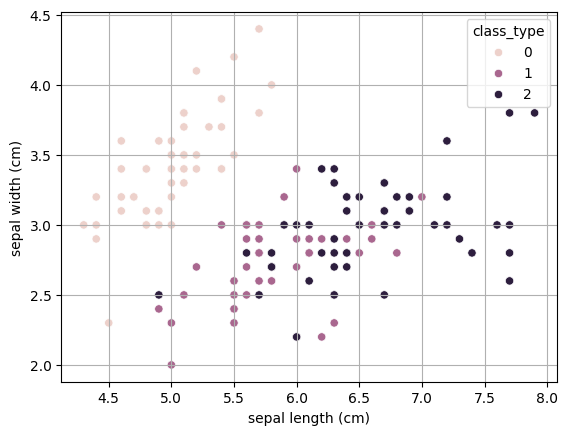

In [45]:
sns.scatterplot(data=df,x="sepal length (cm)",y="sepal width (cm)",hue="class_type")
plt.grid()
plt.show()

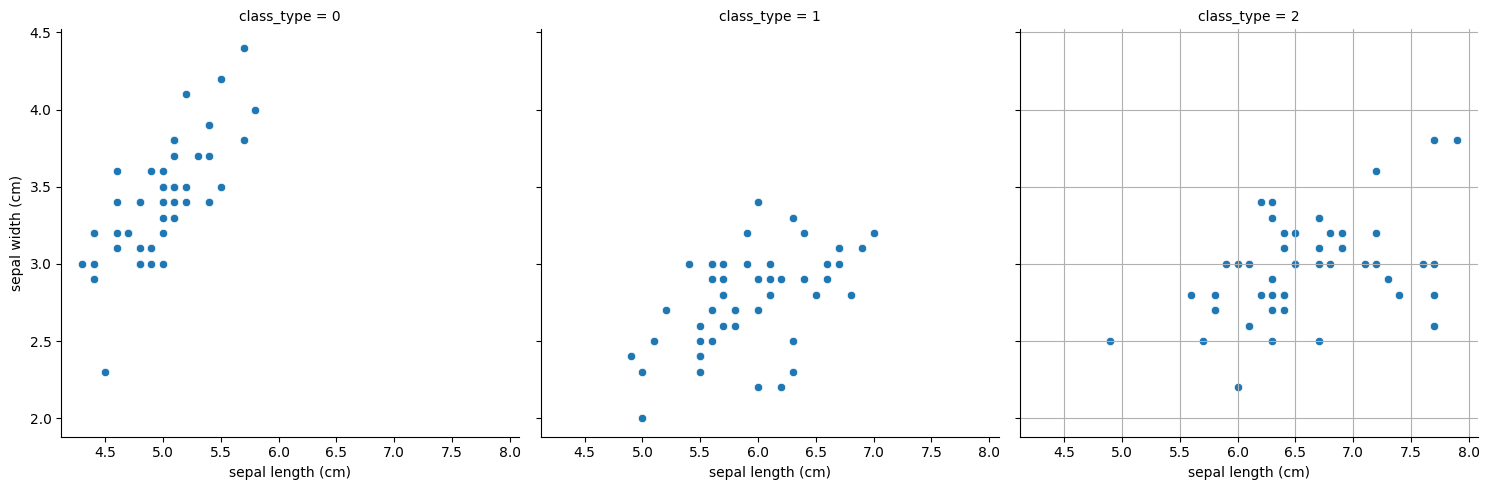

In [46]:
sns.relplot(data=df,x="sepal length (cm)",y="sepal width (cm)",col="class_type")
plt.grid()
plt.show()

In [47]:
#checking skewness
for col in df.columns:
    skewness = df[col].skew()
    print(f"{col} : {skewness}")

sepal length (cm) : 0.3149109566369728
sepal width (cm) : 0.31896566471359966
petal length (cm) : -0.27488417975101276
petal width (cm) : -0.10296674764898116
class_type : 0.0


sepal length (cm) : 0.3149109566369728


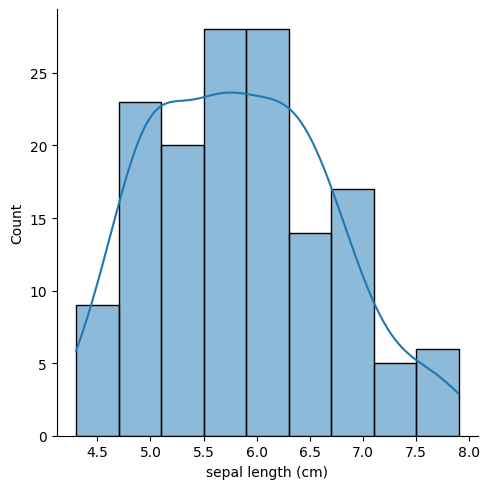

sepal width (cm) : 0.31896566471359966


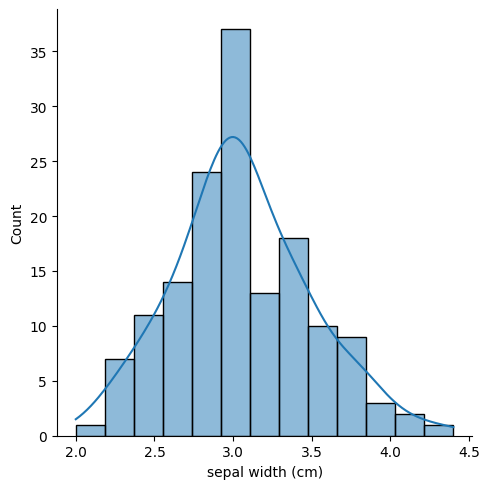

petal length (cm) : -0.27488417975101276


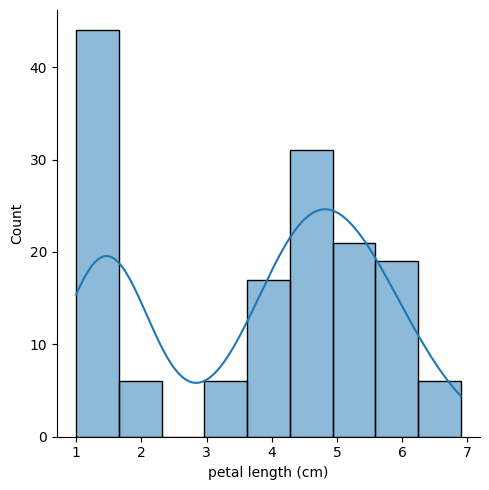

petal width (cm) : -0.10296674764898116


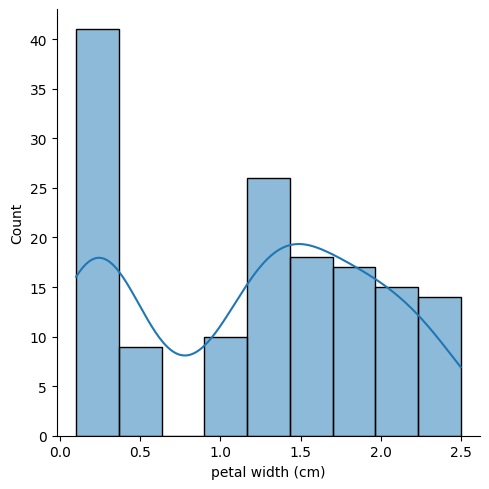

class_type : 0.0


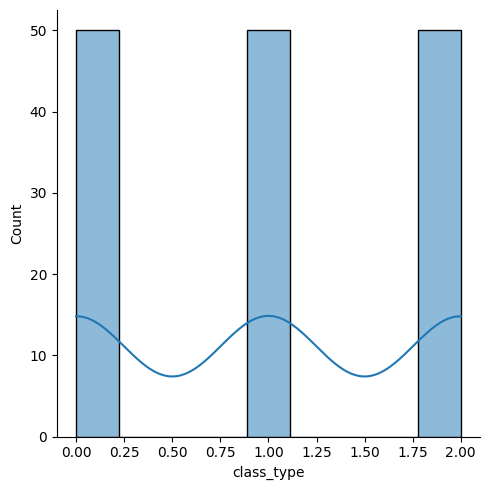

In [48]:
for col in df.columns:
    skewness = df[col].skew()
    print(f"{col} : {skewness}")
    sns.displot(df[col],kde=True)
    plt.show()
    

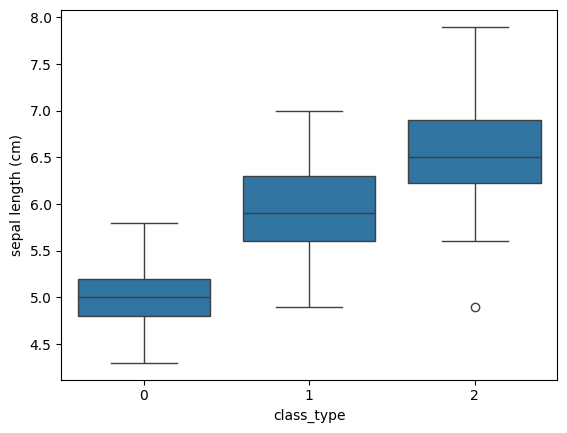

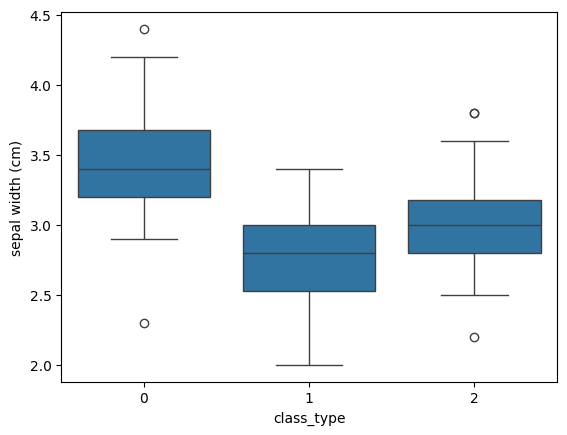

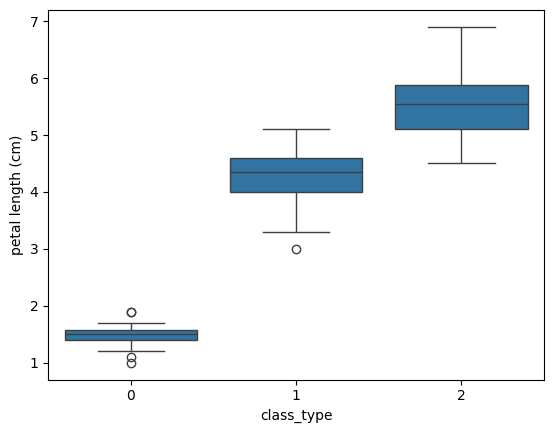

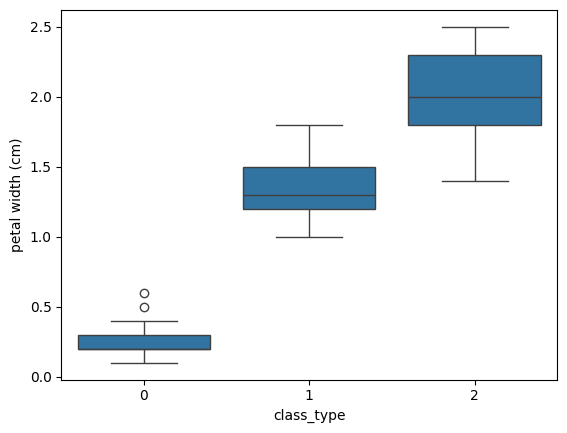

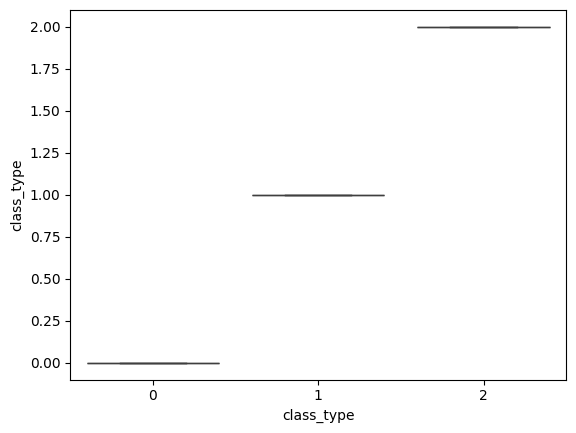

In [49]:
# check outliers using boxplot
for col in df.columns:
    sns.boxplot(data=df,x="class_type",y=df[col])
    plt.show()

In [50]:
x=df.iloc[:,:-1]
y= df.iloc[:,-1]

In [51]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    test = model.score(xtest,ytest)
    train = model.score(xtrain,ytrain)
    print(f"train: {train}")
    print(f"test: {test}")
    
    ac = accuracy_score(ytest,ypred)
    print(ac)
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    cr = classification_report(ytest,ypred)
    print(f"cr: {cr}")

    return model
    

In [53]:
dtc = DecisionTreeClassifier()

In [54]:
mymodel(dtc)

train: 1.0
test: 0.9555555555555556
0.9555555555555556
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
cr:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



DecisionTreeClassifier()

In [55]:
logreg= LogisticRegression()

In [56]:
mymodel(logreg)

train: 0.9809523809523809
test: 0.9777777777777777
0.9777777777777777
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
cr:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



LogisticRegression()

In [57]:
knc = KNeighborsClassifier()

In [58]:
mymodel(knc)

train: 0.9523809523809523
test: 0.9777777777777777
0.9777777777777777
[[14  0  0]
 [ 0 18  0]
 [ 0  1 12]]
cr:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



KNeighborsClassifier()

In [59]:
#GridSearchCv to identify the the best parameters (max depth,min_samples_leaf)

In [60]:
parameter = {
    'criterion':['gini','entropy'],
    'max_depth' : list(range(1,20),),
    'min_samples_leaf' : list(range(1,20))
}

In [61]:
from sklearn.model_selection import GridSearchCV

In [66]:
parameter = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1, 20)),
    'min_samples_leaf': list(range(1, 20))
}

grid = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parameter,verbose=2)

In [67]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=2)

In [68]:
grid.best_score_

0.9523809523809523

In [69]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [70]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}